In [20]:
import pandas as pd
import numpy as np
import os

import collections
import itertools
import ast
import re

import matplotlib.pyplot as plt

from wordcloud import WordCloud
from krwordrank.word import KRWordRank

In [32]:
df = pd.read_csv('Book_title_1999to2020_in_aladin.csv')
del df['ordered']
df['writer'] = df['writer'].map(ast.literal_eval)
df.shape

(11950, 5)

In [57]:
df[(df['writer'].map(len) != 1)]['writer']

79       []
106      []
365      []
519      []
659      []
1142     []
1382     []
1615     []
2436     []
2494     []
2518     []
2594     []
2634     []
2842     []
2959     []
3212     []
3233     []
3264     []
3307     []
3362     []
3399     []
3429     []
3435     []
3486     []
3863     []
4159     []
4213     []
4214     []
4262     []
4281     []
4289     []
4320     []
4332     []
4337     []
4365     []
4419     []
4426     []
4493     []
4589     []
4613     []
4680     []
4716     []
4756     []
5028     []
5117     []
5130     []
5223     []
5247     []
5440     []
5512     []
5576     []
5784     []
5824     []
5869     []
5888     []
6044     []
6066     []
6116     []
6156     []
6168     []
6174     []
6208     []
6282     []
6390     []
6560     []
6571     []
6630     []
6706     []
6936     []
7005     []
7131     []
7290     []
7393     []
7444     []
7540     []
7649     []
7689     []
7694     []
7796     []
7838     []
7876     []
7893     []
7910     []
7982

In [46]:
len(df['writer'].iloc[0])

1

In [67]:
df['writer'] = df[~(df['writer'].map(len) != 1)]['writer'].map(lambda x: ' '.join(x[0]))

In [99]:
find_writer = re.compile(r"(.*?)\((.*?)\)")
df['split_writer'] = df[df['writer'].notna()]['writer'].map(find_writer.findall)

In [3]:
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Komoran

from konlpy.utils import pprint

okt = Okt()
kkma = Kkma()
mecab = Mecab()
komoran = Komoran()

In [4]:
df['title'].iloc[1094:1099].map(okt.nouns)

1094                               [지적, 대화, 위, 지식, 제로, 편]
1095    [하반기, 최신, 판, 해커스, 공기업, 단기, 합격, 기본, 직업, 초능력, 평가...
1096                     [하버드, 상위, 퍼센트, 비밀, 리, 커버, 에디, 션]
1097                                                [프리즘]
1098                                        [트바, 로티, 김호중]
Name: title, dtype: object

In [5]:
df['title'].iloc[1094:1099].map(kkma.nouns)

1094                                   [지적, 대화, 지식, 제, 편]
1095    [2020, 하반, 하반기, 기, 신판, 해, 해커스공기업, 커스, 공기업, 단기,...
1096    [하버드, 상위, 1, 1퍼센트, 퍼센트, 비밀, 리, 리커버, 커버, 디, 디션, 션]
1097                                                [프리즘]
1098                                  [트바, 티, 김, 김호중, 호중]
Name: title, dtype: object

In [6]:
df['title'].iloc[1094:1099].map(mecab.nouns)

1094                                  [지적, 대화, 지식, 제로, 편]
1095    [하반기, 신판, 커스, 공기업, 단기, 합격, 기본, 직업, 기초, 능력, 평가,...
1096                       [하버드, 상위, 퍼센트, 비밀, 리, 커버, 에디션]
1097                                                [프리즘]
1098                                          [트, 티, 김호중]
Name: title, dtype: object

In [7]:
df['title'].iloc[1094:1099].map(komoran.nouns)

1094                                  [지적, 대화, 지식, 제로, 편]
1095    [하반기, 최신판, 해, 커스, 공기업, 단기, 합격, 기본, 직업, 기, 초능력,...
1096                       [하버드, 상위, 퍼센트, 비밀, 리, 커버, 에디션]
1097                                                [프리즘]
1098                                                [김호중]
Name: title, dtype: object

In [8]:
df['nouns'] = df['title'].map(komoran.nouns)

In [9]:
df

,year,month,title,writer,nouns
0,1999,12,개인투자가를 위한 주식 @ 살 때와 팔 때,"[('한국경제신문증권부 ', '(지은이)', '|')]","[개인, 투자가, 주식, 때, 때]"
1,1999,12,"코를 ""킁킁""","[('루스 크라우스 (지은이), 마르크 시몽 (그림), 고진하 ', '(옮긴이)',...",[코]
2,1999,12,신화 속으로 떠나는 언어 여행,"[('아이작 아시모프 (지은이), 김대웅 ', '(옮긴이)', '|')]","[신화, 속, 언어, 여행]"
3,1999,12,오늘은 다르게,"[('박노해 ', '(지은이)', '|')]",[오늘]
4,1999,12,어른의 학교,"[('이윤기 (지은이), 정병규 (엮은이), 정재규 ', '(그림)', '|')]","[어른, 학교]"
...,...,...,...,...,...
1095,2020,9,2020 하반기 최신판 해커스공기업 단기 합격 NCS 기본서 직업기초능력평가 + 직...,"[('김소원, 김태형, 복지훈, 윤종혁, 해커스 취업교육연구소 ', '(지은이)',...","[하반기, 최신판, 해, 커스, 공기업, 단기, 합격, 기본, 직업, 기, 초능력,..."
1096,2020,9,하버드 상위 1퍼센트의 비밀 (리커버 에디션),"[('정주영 ', '(지은이)', '|')]","[하버드, 상위, 퍼센트, 비밀, 리, 커버, 에디션]"
1097,2020,9,프리즘,"[('손원평 ', '(지은이)', '|')]",[프리즘]
1098,2020,9,"트바로티, 김호중","[('김호중 (지은이), 스토리베리 ', '(구성)', '|')]",[김호중]


In [10]:
text_list = list(itertools.chain(*df['nouns'].tolist()))

In [11]:
wordrank_extractor = KRWordRank(
#     min_count = 2, # 단어의 최소 출현 빈도수 (그래프 생성 시)
#     max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(text_list, beta, max_iter)

for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

scan vocabs ... 
num vocabs = 482
done = 10
      한국:	2.1514
      나의:	1.6436
      이야:	1.4036
      해리:	1.3455
      교과:	1.2920
      포터:	1.2565
     사랑해:	1.1231
      메이:	1.1230
      그림:	1.1177
      문제:	1.1106
      아저:	1.0000
      크리:	1.0000
      살아:	1.0000
      테이:	1.0000
      마법:	1.0000
      소아:	1.0000
      에디:	1.0000
      하이:	1.0000
      경제:	0.9137
      개정:	0.8748
      한정:	0.8748
      어린:	0.8688
      스토:	0.8502
      10:	0.7782
      세상:	0.7321
      보고:	0.6691
      행복:	0.6352
      세밀:	0.6188
      로마:	0.6104
      셜록:	0.5966


In [12]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800
)
wordcloud = wordcloud.generate_from_frequencies(collections.Counter(text_list))

In [13]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

<class 'numpy.ndarray'>
(800, 800, 3)


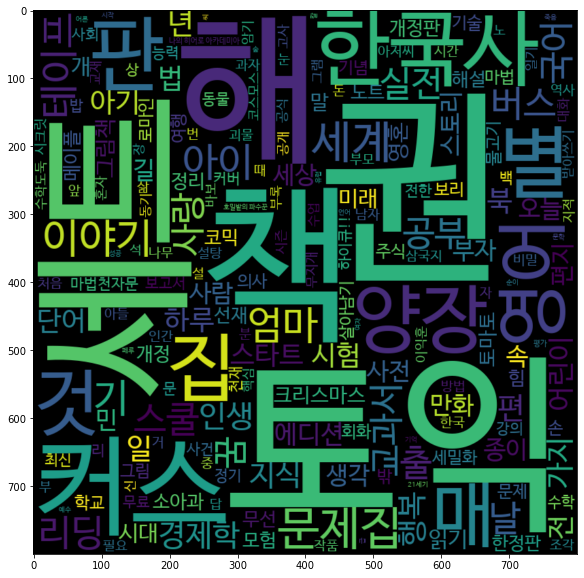

In [14]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")